# Convolutional Autoencoder with K-Means

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


# to import MNIST as torch tensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [2]:
# Create training and test dataloaders

num_workers = 0
# how many samples per batch to load
batch_size = 100
lr = 1e-3
# how many epochs for training
num_epochs = 40

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [3]:
# create a an autoencoder neural network
class cae(nn.Module):
    def __init__(self):
        super(cae, self).__init__()
        # convolutional encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # 16, 5, 5
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # 32, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # 32, 2, 2
        )
        # autoencoder bottle neck
        self.latent = nn.Sequential(
            nn.Linear(32*2*2, 10),
            #nn.Sigmoid()
        )
        self.upscale = nn.Sequential(
            nn.Linear(10, 32*2*2),
            nn.ReLU(True),
        )
        # convolutional decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2),  # 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # 1, 28, 28
            nn.Tanh()
        )
    # forward learning path
    def forward(self, x):
        x = self.encoder(x)
        x = self.latent(x.view(-1, 32*2*2))
        
        bottle_neck = F.sigmoid(x)
        x = F.tanh(x)
        
        x = self.upscale(x)
        x = self.decoder(x.view(-1, 32, 2, 2))
        return x, bottle_neck

In [4]:
# build a CAE model
model = cae()
# set loss function
criterion = nn.MSELoss()
# choose an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                             weight_decay=1e-5)
print(model)

cae(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (latent): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
  (upscale): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)


In [5]:
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        # forward path
        output, _ = model(img)
        loss = criterion(output, img)
        # back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # log
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.item()))

C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch [1/40], loss:0.0417
epoch [2/40], loss:0.0353
epoch [3/40], loss:0.0320
epoch [4/40], loss:0.0299
epoch [5/40], loss:0.0286
epoch [6/40], loss:0.0277
epoch [7/40], loss:0.0271
epoch [8/40], loss:0.0268
epoch [9/40], loss:0.0264
epoch [10/40], loss:0.0261
epoch [11/40], loss:0.0259
epoch [12/40], loss:0.0258
epoch [13/40], loss:0.0256
epoch [14/40], loss:0.0254
epoch [15/40], loss:0.0253
epoch [16/40], loss:0.0251
epoch [17/40], loss:0.0250
epoch [18/40], loss:0.0248
epoch [19/40], loss:0.0246
epoch [20/40], loss:0.0245
epoch [21/40], loss:0.0243
epoch [22/40], loss:0.0241
epoch [23/40], loss:0.0240
epoch [24/40], loss:0.0240
epoch [25/40], loss:0.0237
epoch [26/40], loss:0.0237
epoch [27/40], loss:0.0235
epoch [28/40], loss:0.0235
epoch [29/40], loss:0.0234
epoch [30/40], loss:0.0233
epoch [31/40], loss:0.0232
epoch [32/40], loss:0.0231
epoch [33/40], loss:0.0230
epoch [34/40], loss:0.0229
epoch [35/40], loss:0.0228
epoch [36/40], loss:0.0228
epoch [37/40], loss:0.0228
epoch [38/

C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


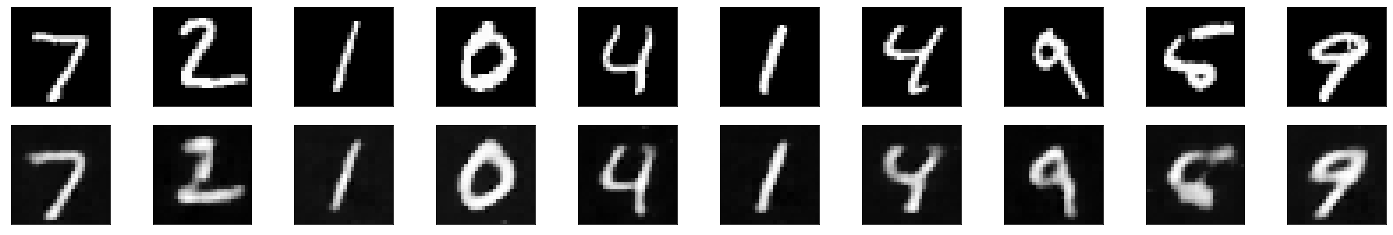

In [17]:
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output, _ = model(images)
# prep images for display
images = images.numpy()# output is resized into a batch of iages
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [32]:
###### run the dataset through the trained model
for image_index, data in enumerate(train_loader):
    images, itr_labels = data
    # forward pass: compute embedded outputs by passing inputs to the model
    decoded, encoded = model(images)
    if not image_index:
        #First group encoded in new array
        embedded = encoded.detach().numpy()
        #first group decoded
        disembedded = decoded.detach().numpy()
        #labels
        labels = itr_labels.detach().numpy()
        continue
    #stacking the remaining data
    embedded = np.vstack((embedded, encoded.detach().numpy()))
    disembedded = np.vstack((disembedded, decoded.detach().numpy()))
    labels = np.hstack((labels, itr_labels.detach().numpy()))

C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Hassan\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [8]:
from sklearn.cluster import KMeans

# create a k-means model to cluster the embedded features
clustering_model = KMeans(n_clusters=10, tol = 1e-4, max_iter = 400).fit(embedded)

In [9]:
import import_ipynb
import DataVisuals as dv


view_results = dv.DataVisuals(disembedded.reshape(-1, 28,28), labels, model = clustering_model)

importing Jupyter notebook from DataVisuals.ipynb


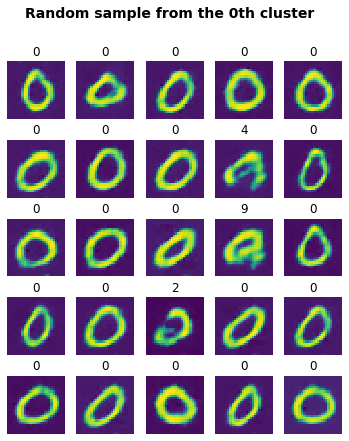

In [21]:
#view reconstructed random samples belonging to the same cluster
view_results.view_lblsample(0)

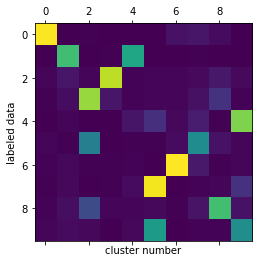

In [11]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the predictions
cm = confusion_matrix(labels, clustering_model.labels_)

fig_cnvtx, ax_cnvtx = plt.subplots()
ax_cnvtx.matshow(cm) 
ax_cnvtx.set_xlabel('cluster number') and ax_cnvtx.set_ylabel('labeled data')
plt.show()

In [12]:
from sklearn.metrics import cluster
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, silhouette_samples


#metrics
def evaluate_km(labels_true, labels_pred):
    eva = {}
    eva['adjusted_rand_score'] = cluster.adjusted_rand_score(labels_true, labels_pred.labels_)
    eva['mutual_info_score'] = cluster.mutual_info_score(labels_true, labels_pred.labels_)
    eva['adjusted_mutual_info_score'] = cluster.adjusted_mutual_info_score(labels_true, labels_pred.labels_)
    eva['homogeneity_completeness_v_measure'] = cluster.homogeneity_completeness_v_measure(labels_true, labels_pred.labels_)
    eva['completeness_score'] = cluster.completeness_score(labels_true, labels_pred.labels_)
    eva['distortion'] = labels_pred.inertia_
    eva['Itritions'] = labels_pred.n_iter_
    eva['Silhouette_Co'] = silhouette_score(embedded, labels_pred.labels_)
    
    return eva

In [13]:
#evalution
eva = evaluate_km(train_data.train_labels, clustering_model)

C:\Users\Hassan\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [14]:
[print(metric, ' = ', value) for metric, value in eva.items()]

adjusted_rand_score  =  0.487458184615246
mutual_info_score  =  1.3346208268418422
adjusted_mutual_info_score  =  0.5798543367257382
homogeneity_completeness_v_measure  =  (0.5799776228751675, 0.5889164574366449, 0.5844128613690242)
completeness_score  =  0.5889164574366449
distortion  =  2508.1920954229613
Itritions  =  39
Silhouette_Co  =  0.18555418


[None, None, None, None, None, None, None, None]

In [15]:
import pickle


# save the model to disk
#pickle.dump(model, open('emnistcae001.sav', 'wb'))

In [16]:
cluster.normalized_mutual_info_score(train_data.train_labels, clustering_model.labels_)

C:\Users\Hassan\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5844299505126085

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedded)

KeyboardInterrupt: 

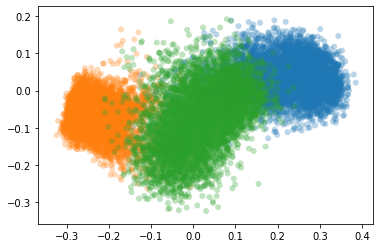

In [59]:
fig, ax = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for label, color in enumerate(colors):
    for i, x in enumerate(labels):
        if label == x:
            ax.scatter(pca_result[i, 0], pca_result[i, 1], c=color, label=label,
                       alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

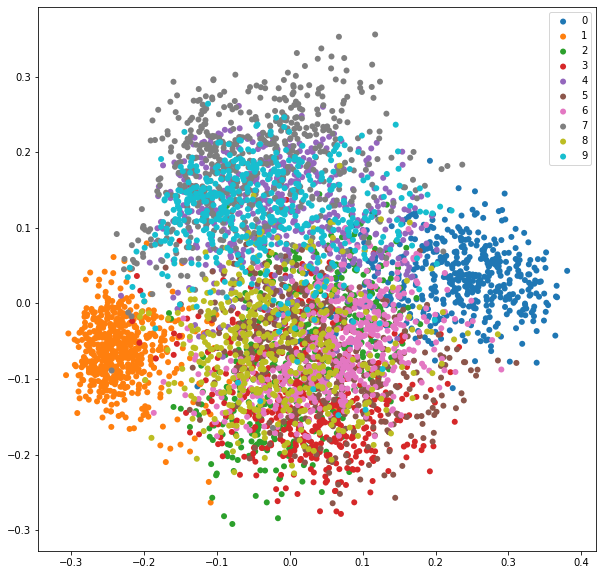

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for no, color in enumerate(colors):
    x = []
    y = []
    for i, label in enumerate(labels[:5000]):
        if(label == no):
            x.append(pca_result[i, 0])
            y.append(pca_result[i, 1])
    ax.scatter(x, y, c=color, label = no,
                 edgecolors='none') #alpha=0.3,

"""
for i, x in enumerate(labels[:1000]):
        ax.scatter(pca_result[i, 0], pca_result[i, 1], c=colors[x], label = colors[x],
                 edgecolors='none') #alpha=0.3,
"""
ax.legend()
#ax.grid(True)

plt.show()

No handles with labels found to put in legend.


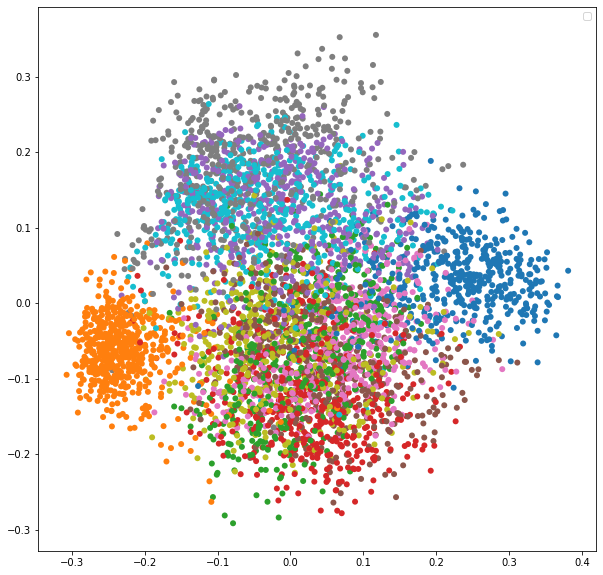

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i, x in enumerate(labels[:5000]):
        ax.scatter(pca_result[i, 0], pca_result[i, 1], c=colors[x],
                 edgecolors='none') #alpha=0.3,

ax.legend()
#ax.grid(True)

plt.show()